# datafun-07-applied 
### Brooke Richards 6/10/2024  
https://github.com/Karpoozi/datafun-07-applied 
#### In this project I will build a model, make predictions, visualize the model and publish my insights.

## Project Start

In [167]:
# import dependencies
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import seaborn as sns


## Part 1 - Chart a Straight Line

#### Place the data in a DataFrame

In [168]:
c = lambda f: 5/9 * (f - 32) # create a lambda to calculate Celsius from Fahrenheit
temps = [(f, c(f)) for f in range(0, 101, 10)] # use the lambda to calculate Celsius equivalents of the Fahrenheit temperatures 0–100 in 10-degree increments
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius']) # create DataFrame 

#### Display plot

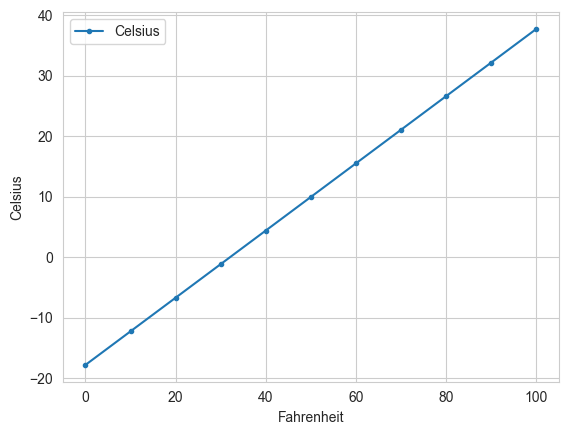

In [169]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-') # organize plot
y_label = axes.set_ylabel('Celsius') # manually label the y-axis

The equation for points on a straight line (in two dimensions), as seen in the previous graph, is: ( y = mx + b ). Here, ( m ) is the slope of the line, ( b ) is where it crosses the y-axis (at () (0, b) ), ( x ) is the independent variable (date), and ( y ) is the dependent variable (temperature). In simple linear regression, ( y ) predicts the value for a given ( x ).

## Part 2 Prediction

### Section 1 - Data Acquisition

In [170]:
# download the data file to your project folder and then load the data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [171]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90
3,189801,39.60,2.20
4,189901,36.40,-1.00


In [172]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.50,-1.90
120,201501,36.10,-1.30
121,201601,40.80,3.40
122,201701,42.80,5.40
123,201801,38.70,1.30


### Section 3 - Data Cleaning

In [173]:
# rename DataFrame columns for readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# verify changes
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90


In [174]:
# the x-axis labels will be more readable if they do not contain 01 for January 
nyc_df.Date.dtype # check the column data type
nyc_df.Date = nyc.Date.floordiv(100) # each column in df is a Series, the floordiv method performs integer division on every element of the Series

# verify changes
nyc_df.head(3) 

,Date,Temperature,Anomaly
0,18,34.20,-3.20
1,18,34.70,-2.70
2,18,35.50,-1.90


### Section 4 - Descriptive Statistics

In [175]:
# round statistics to .00
pd.set_option('display.precision', 2)

# display temperature stats
nyc_df.Temperature.describe()

count   124.00
mean     37.60
std       4.54
min      26.10
25%      34.58
50%      37.60
75%      40.60
max      47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [176]:
# use linregress function to calculate slope and intercept for the best fit line through the data
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [177]:
# determine slope
linear_regression.slope

0.014771361132966163

In [178]:
# determine y coordinate of the y intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [179]:
# calculate the average high temp in Jan 2024
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

(10.0, 70.0)

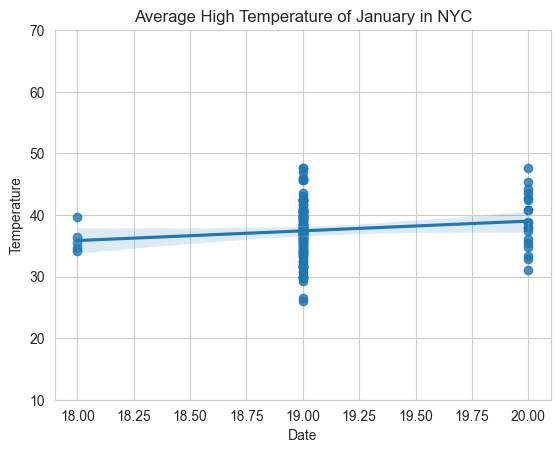

In [181]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_title('Average High Temperature of January in NYC')
axes.set_ylim(10, 70)